Dataset: https://github.com/dsrscientist/DSData/blob/master/SBI_Life_insurance.csv

<b>Description: </b>
This is "SBI Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.<br>

<b>age:</b> age of policyholder<br>
<b>sex:</b> gender of policy holder (female=0, male=1)<br>
<b>bmi:</b> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 steps: average walking steps per day of policyholder<br>
<b>children:</b> number of children / dependents of policyholder<br>
<b>smoker:</b> smoking state of policyholder (non-smoke=0;smoker=1)<br>
<b>region:</b> the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)<br>
<b>charges:</b> individual medical costs billed by health insurance<br>
<b>insuranceclaim:</b> yes=1, no=0<br>

<b>Importing Necessary Libraries</b>

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [151]:
s_data=pd.read_csv("SBI_Life_insurance.csv")
s_data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [152]:
s_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [153]:
s_data.shape

(1338, 8)

<b>Observation:</b>
There are 1338 rows and 8 columns.

In [14]:
s_data.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

<b>Observation:</b>
There are 8 attributes out of which 6 attributes(age,sex,children,smoker,region,insuranceclaim) are of int data type and 2 attributes (bmi,charges) are of float data type.

<b>Checking Missing value</b>

In [15]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [3]:
s_data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

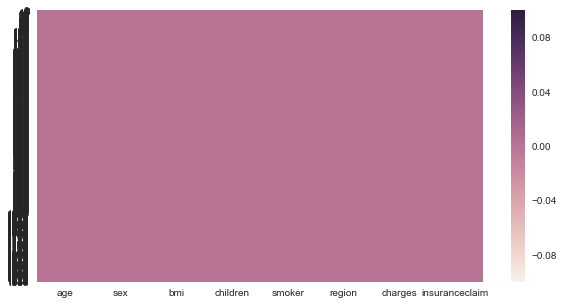

In [13]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(s_data.isnull(), ax=ax)
plt.show()

<b>Observation:</b>
There are no missing values in the dataset.

<b>Summary Statistics</b>

In [25]:
s_data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


<b>Observations:</b>
<li> The age of people varies from 18 to 64.</li>
<li> The value of bmi varies from ~15 to 53.</li>

# Exploratory Data Analysis

<b>Uni-variate Analysis</b>

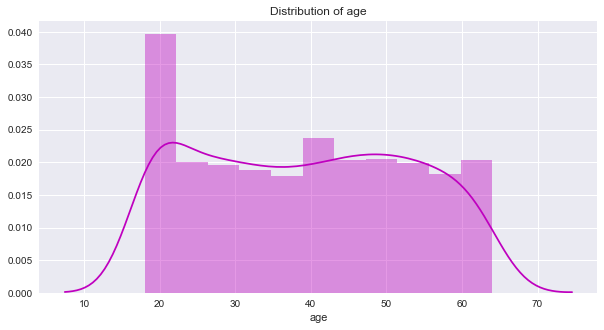

In [27]:
import warnings 
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,5))
plt.title("Distribution of age")
a = sns.distplot(s_data["age"], color = 'm')

<b>Obseration:</b>
The average age of people is ~39.

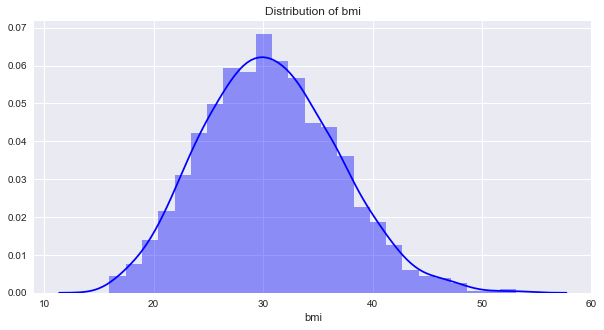

In [29]:
plt.figure(figsize=(10,5))
plt.title("Distribution of bmi")
b = sns.distplot(s_data["bmi"], color = 'b')

<b>Observation:</b>
The average bmi is 30.

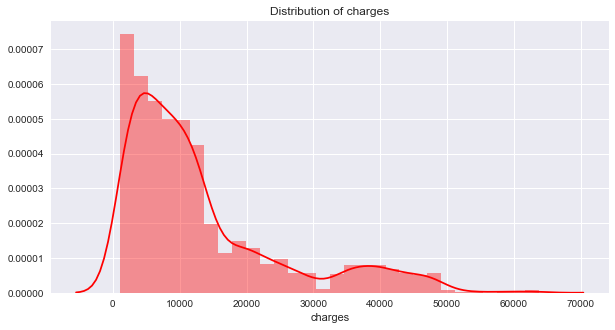

In [31]:
plt.figure(figsize=(10,5))
plt.title("Distribution of charges")
c = sns.distplot(s_data["charges"], color = 'r')

<b>Observation:</b>
The average charges is ~8000.

<b>Measure of Skewness</b>

In [34]:
s_data.skew(axis=0)

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

<b>Observations:</b>
<li> The attribute smoker has skewness of 1.464766 which means that skewness is > 0 i.e. more weight in the left tail of the distribution.</li>
<li> The attribute charges has skewness of 1.515880 which means that skewness is > 0 i.e. more weight in the left tail of the distribution.</li>

<b>Check Outliers</b>

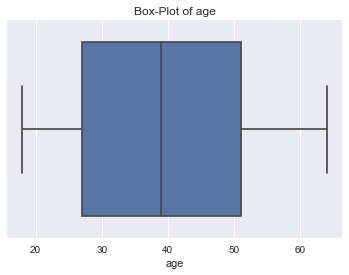

In [36]:
a1=sns.boxplot(x=s_data['age'])
a1.set_title("Box-Plot of age")
plt.show(a1)

From the above visualization, there is no outlier in the age.

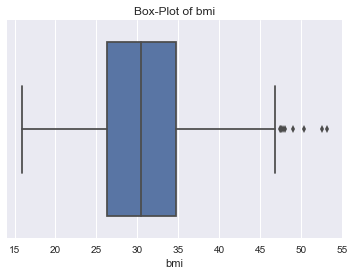

In [38]:
b1=sns.boxplot(x=s_data['bmi'])
b1.set_title("Box-Plot of bmi")
plt.show(b1)

From the above visualization, there is outlier in the bmi above 47.

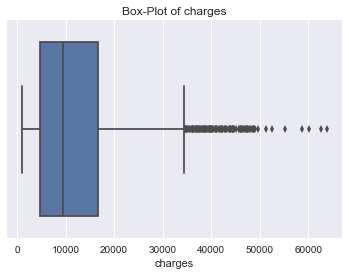

In [39]:
c1=sns.boxplot(x=s_data['charges'])
c1.set_title("Box-Plot of charges")
plt.show(c1)

From the above visualization, there is outlier above 35000 in the charges.

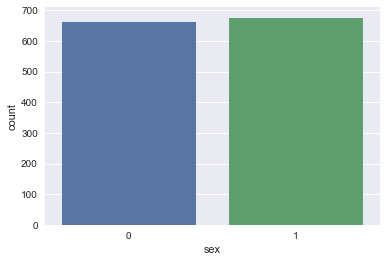

In [41]:
sns.countplot(s_data['sex'])

<b>Observation:</b>
There are more males as compare to females.

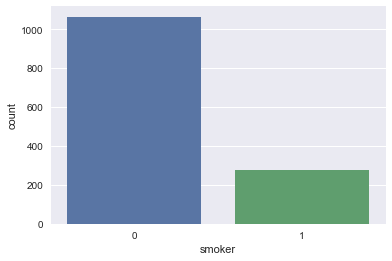

In [42]:
sns.countplot(s_data['smoker'])

<b>Observation:</b>
There are more people who do not smoke.

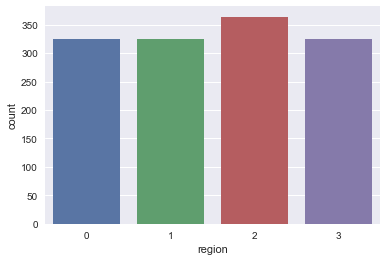

In [44]:
sns.countplot(s_data['region'])

<b>Observation:</b>
From the above visualization, there are more people from southeast.

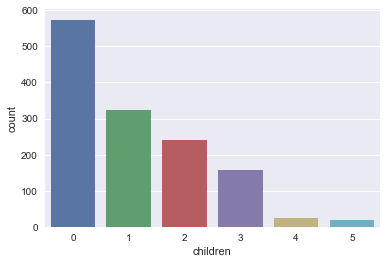

In [45]:
sns.countplot(s_data['children'])

<b>Observation:</b>
There are more people with no children.

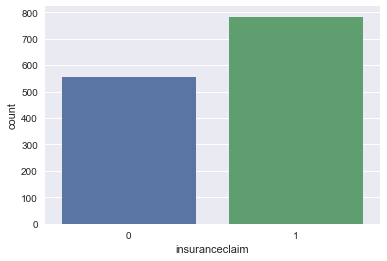

In [49]:
# Lets count each class in target variable(insuranceclaim)
sns.countplot(s_data["insuranceclaim"])

<b>Observation:</b>
From the above visualization, we can see that data is imbalanced.

<b>Bi-Variate Analysis</b>

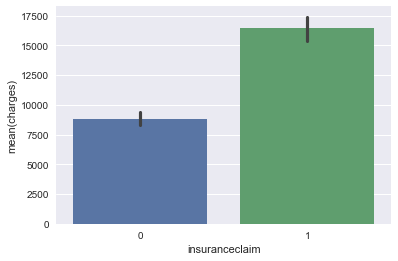

In [51]:
sns.barplot(x="insuranceclaim",y="charges",data=s_data)

<b>Observation:</b>
There are more people who have claimed insurance and their charges are ~ 160000.

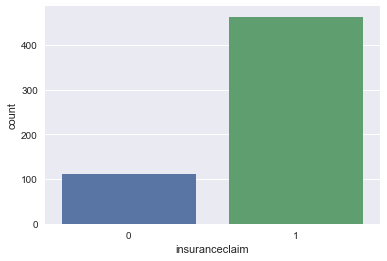

In [52]:
sns.countplot(x="insuranceclaim", data=s_data.loc[s_data["children"]==0])

<b>Observation:</b>
More people have claimed insurance and have no children.

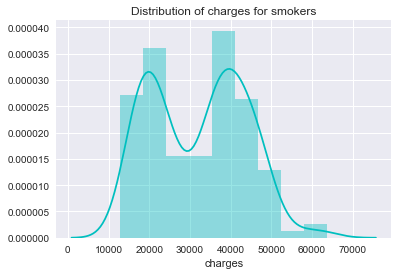

In [56]:
a2=sns.distplot(s_data[(s_data.smoker == 1)]["charges"],color='c')
a2.set_title('Distribution of charges for smokers')
plt.show()

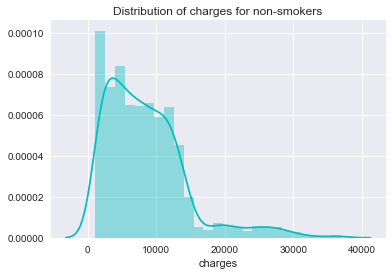

In [57]:
b2=sns.distplot(s_data[(s_data.smoker == 0)]["charges"],color='c')
b2.set_title('Distribution of charges for non-smokers')
plt.show()

<b>Observation:</b>
<li>From the above two visulaization, people who smoke spend more on treatment as compare to the people who don't smoke. Yes, the charges of people who smoke differ from the people who don't smoke.</li>

<b>Pair-Plot</b>

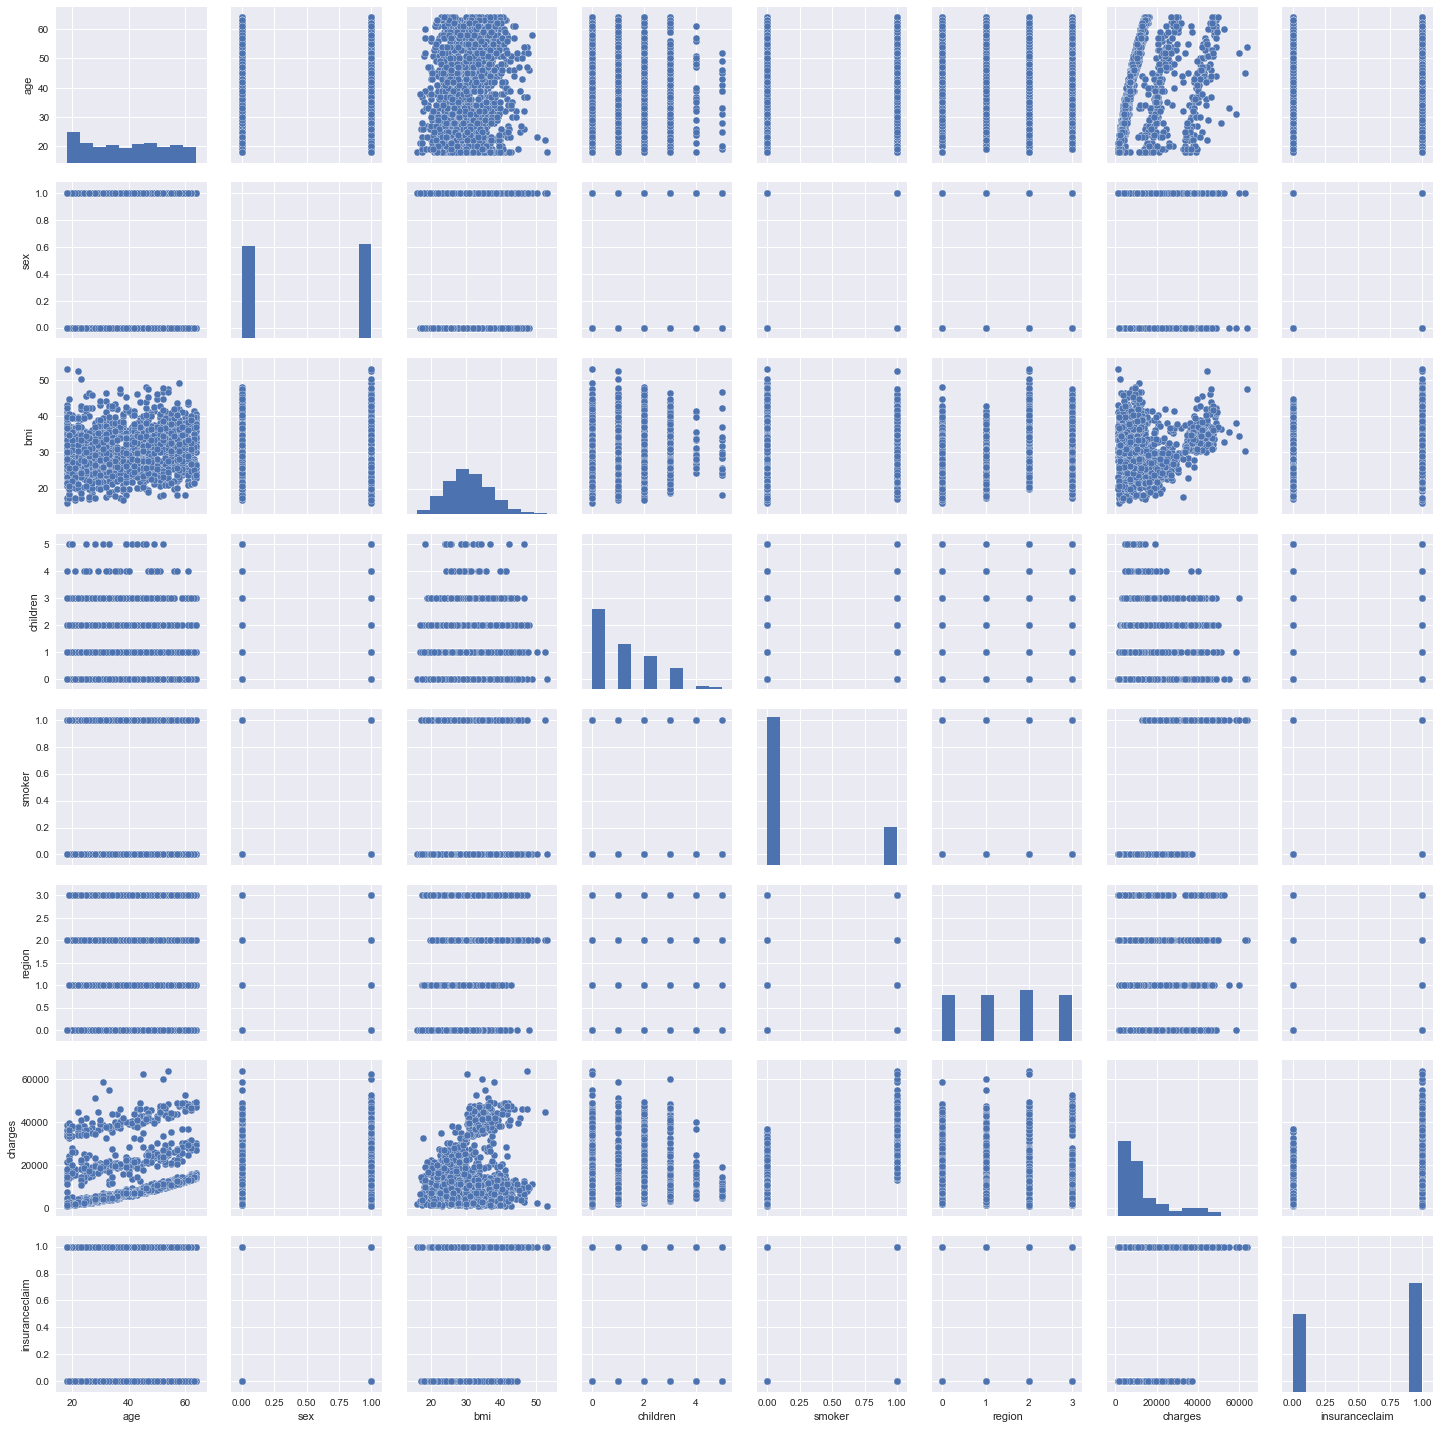

In [46]:
sns.pairplot(s_data)

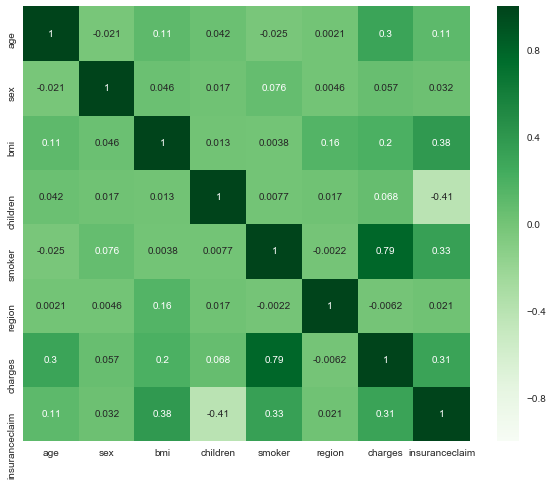

In [301]:
heatmap=s_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(heatmap, cmap="Greens",annot=True)

<b>Observation:</b>
charges and smoker are highly correlated.

<b>Treating Outliers</b>

In [302]:
from scipy.stats import zscore
z_score=abs(zscore(s_data))
print("The shape of dataset before removing outliers",s_data.shape)
s_data=s_data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",s_data.shape)

The shape of dataset before removing outliers (1338, 8)
The shape of dataset after removing outliers (1309, 8)


<b>Splitting into input and output varibale</b>

In [303]:
X= s_data.drop("insuranceclaim",axis=1)
y= s_data[["insuranceclaim"]]

<b>Checking outliers in the dataset</b>

In [304]:
# Check whether their are outliers present in the dataset or not
from scipy import stats
from scipy.stats import zscore
z = np.abs(stats.zscore(X))
print(z)

[[1.43906316 1.00536197 0.44935891 ... 1.98484827 1.35275274 0.32345355]
 [1.5100858  0.99466663 0.53339072 ... 0.50381685 0.44745962 0.96849975]
 [0.79985933 0.99466663 0.40447808 ... 0.50381685 0.44745962 0.73635529]
 ...
 [1.5100858  1.00536197 1.04904129 ... 0.50381685 0.44745962 0.97665735]
 [1.29701786 1.00536197 0.80093884 ... 0.50381685 1.35275274 0.94443291]
 [1.54388803 1.00536197 0.25347866 ... 1.98484827 0.45783349 1.36800497]]


In [305]:
threshold = 3
print(np.where(z > 3))

(array([ 170,  276,  325,  480,  522,  886, 1042, 1216], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6], dtype=int64))


In [306]:
print(z[21][1])

1.0053619687316817


<b>Observation:</b>
<li> The z-score is less than 3.Hence, outlier is not present.</li>

<b>Standard Scaler</b>

In [307]:
# Lets bring the dataset features into same scle
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

<b>Splitting the data into training and testing</b>

In [308]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30,stratify=y)

# Machine Learning Models

As it is classification problem, we will use Logistic Regression, DecisionTreeClassifier, NaiveBayesClassifier, Support Vector Machine and Gradient Boosting Classifier. 

In [309]:
# We will use f1 score as the metrics 
from sklearn.metrics import f1_score

def f1_max_score(model,X,y):
    f1_max_score=0
    random_state=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        model.fit(X_train,y_train)
        y_pred= model.predict(X_test)
        score=f1_score(y_test,y_pred)
        if score>f1_max_score:
            f1_max_score=score
            random_state=r_state
    print("Maximum F1_Score is at random_state:",random_state," and it is :",round((f1_max_score),3))

<b>Logistic Regression</b>

In [310]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
f1_max_score(log_r,X,y)
predlogr= log_r.predict(X_test)
model_1= log_r.score(X_test, y_test)
print("The accuracy of the Logistic Model is:",round((model_1),3))

Maximum F1_Score is at random_state: 77  and it is : 0.931
The accuracy of the Logistic Model is: 0.901


In [311]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predlogr))

[[137  25]
 [ 14 217]]


<b>Observations:</b>
<li> There are 137 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 217 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 25 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 14 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [312]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predlogr))

             precision    recall  f1-score   support

          0       0.91      0.85      0.88       162
          1       0.90      0.94      0.92       231

avg / total       0.90      0.90      0.90       393



<b>Observation:</b>
<li>we got precision 0.90 and recall 0.90.</li>

In [313]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Build the K-Fold Cross-Validator
kfold= KFold(n_splits=3, random_state=10)

In [314]:
result1= cross_val_score(log_r, X=X_train,y=y_train, cv=kfold,n_jobs=-1,scoring="f1").mean()
print("Mean F1 Score after K-Fold cross validation",result1)
result_1= cross_val_score(log_r, X=X_train,y=y_train, cv=kfold,n_jobs=-1,scoring="f1").std()
print("standard deviation for logistic from mean f1 score is",result_1)

Mean F1 Score after K-Fold cross validation 0.8871216565759504
standard deviation for logistic from mean f1 score is 0.015005912067166078


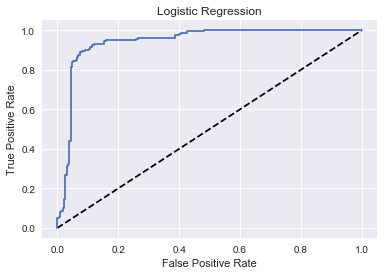

In [315]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= log_r.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [316]:
auc_score1=roc_auc_score(y_test, log_r.predict(X_test))
auc_score1

0.8925364758698092

<b>Decision Tree Classifier</b>

In [317]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)

f1_max_score(dt,X,y)
pred_dt= dt.predict(X_test)
model_2= dt.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((model_2),3))

Maximum F1_Score is at random_state: 93  and it is : 0.945
The accuracy of the Decision Tree Model is: 0.916


In [318]:
print(confusion_matrix(y_test,pred_dt))

[[158   4]
 [ 29 202]]


<b>Observations:</b>
<li> There are 158 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 202 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 4 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 29 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [319]:
print(classification_report(y_test,pred_dt))

             precision    recall  f1-score   support

          0       0.84      0.98      0.91       162
          1       0.98      0.87      0.92       231

avg / total       0.92      0.92      0.92       393



<b>Observation:</b>
<li>we got precision and recall equal.</li>

In [320]:
result2= cross_val_score(dt, X=X_train,y=y_train, cv=kfold,n_jobs=-1,scoring="f1").mean()
print("Mean F1 Score after K-Fold cross validation",result2)
result_2= cross_val_score(dt, X=X_train,y=y_train, cv=kfold,n_jobs=-1,scoring="f1").std()
print("standard deviation for Decision Tree Classifier from mean f1 score is",result_2)

Mean F1 Score after K-Fold cross validation 0.8967044059835275
standard deviation for Decision Tree Classifier from mean f1 score is 0.024189195967265865


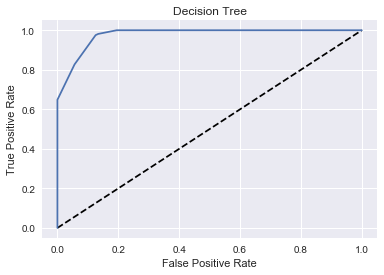

In [321]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= dt.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree")
plt.show()

In [322]:
auc_score2=roc_auc_score(y_test, dt.predict(X_test))
auc_score2

0.9248837582170915

<b>Naive Bayes Classifier</b>

In [323]:
from sklearn.naive_bayes import GaussianNB
n_b = GaussianNB()
f1_max_score(n_b,X,y)
prednb= n_b.predict(X_test)
model_3= n_b.score(X_test, y_test)
print("The accuracy of the Gaussian NB Model is:",round((model_3),3))

Maximum F1_Score is at random_state: 95  and it is : 0.799
The accuracy of the Gaussian NB Model is: 0.733


In [324]:
print(confusion_matrix(y_test,prednb))

[[144  18]
 [ 87 144]]


<b>Observations:</b>
<li> There are 144 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 144 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 18 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 87 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [325]:
print(classification_report(y_test,prednb))

             precision    recall  f1-score   support

          0       0.62      0.89      0.73       162
          1       0.89      0.62      0.73       231

avg / total       0.78      0.73      0.73       393



<b>Observation:</b>
<li>we got precision 0.78 and recall 0.73 that means that we got high precision, low recall:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)</li>

In [326]:
result3= cross_val_score(n_b, X=X_train,y=y_train, cv=kfold,n_jobs=-1,scoring="f1").mean()
print("Mean F1 Score after K-Fold cross validation",result3)
result_3= cross_val_score(n_b, X=X_train,y=y_train, cv=kfold,n_jobs=-1,scoring="f1").std()
print("standard deviation for Naive Bayes from mean f1 score is",result_3)

Mean F1 Score after K-Fold cross validation 0.6881133944217036
standard deviation for Naive Bayes from mean f1 score is 0.01439386398537891


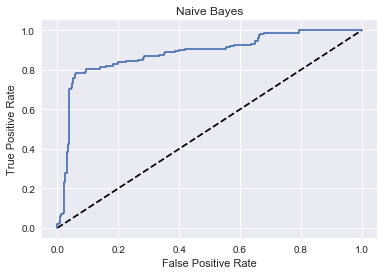

In [327]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= n_b.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes")
plt.show()

In [328]:
auc_score3=roc_auc_score(y_test, n_b.predict(X_test))
auc_score3

0.7561327561327561

<b>Support Vector Machine</b>

In [329]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
sv=SVC(probability=True)
sv.fit(X,y)
f1_max_score(sv,X,y)
pred_sv= sv.predict(X_test)
model_4= sv.score(X_test, y_test)
print("The accuracy of the SVM Model is:",round((model_4),3))

Maximum F1_Score is at random_state: 50  and it is : 0.946
The accuracy of the SVM Model is: 0.929


In [330]:
print(confusion_matrix(y_test,pred_sv))

[[149  13]
 [ 15 216]]


<b>Observations:</b>
<li> There are 149 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 216 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 13 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 15 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [331]:
print(classification_report(y_test,pred_sv))

             precision    recall  f1-score   support

          0       0.91      0.92      0.91       162
          1       0.94      0.94      0.94       231

avg / total       0.93      0.93      0.93       393



<b>Observation:</b>
<li>we got precision and recall equal.</li>

In [332]:
result4= cross_val_score(sv, X=X_train,y=y_train, cv=kfold,n_jobs=-1,scoring="f1").mean()
print("Mean F1 Score after K-Fold cross validation",result4)
result_4= cross_val_score(sv, X=X_train,y=y_train, cv=kfold,n_jobs=-1,scoring="f1").std()
print("standard deviation for SUpport Vector from mean f1 score is",result_4)

Mean F1 Score after K-Fold cross validation 0.891863150707556
standard deviation for SUpport Vector from mean f1 score is 0.008775351306113194


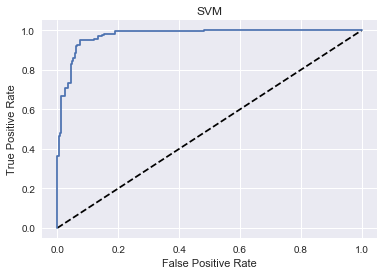

In [333]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= sv.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM")
plt.show()

In [334]:
auc_score4=roc_auc_score(y_test, sv.predict(X_test))
auc_score4

0.9274090107423439

<b>Gradient Boosting Classifier</b>

In [335]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.06, max_depth=5)
f1_max_score(gb,X,y)
predgb= gb.predict(X_test)
model_5= gb.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((model_5),3))

Maximum F1_Score is at random_state: 95  and it is : 0.998
The accuracy of the Grading Boosting Model is: 0.987


In [336]:
print(confusion_matrix(y_test,predgb))

[[158   4]
 [  1 230]]


<b>Observations:</b>
<li> There are 158 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 230 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 4 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 1 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [337]:
print(classification_report(y_test,predgb))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       162
          1       0.98      1.00      0.99       231

avg / total       0.99      0.99      0.99       393



<b>Observation:</b>
We got precision and recall equal.

In [338]:
result5= cross_val_score(gb, X=X_train,y=y_train, cv=kfold,n_jobs=-1,scoring="f1").mean()
print("Mean F1 Score after K-Fold cross validation",result5)
result_5= cross_val_score(gb, X=X_train,y=y_train, cv=kfold,n_jobs=-1,scoring="f1").std()
print("standard deviation for Gradient Boosting from mean f1 score is",result_5)

Mean F1 Score after K-Fold cross validation 0.9703554382231401
standard deviation for Gradient Boosting from mean f1 score is 0.019623441491207618


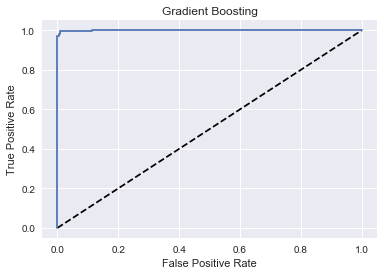

In [339]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= gb.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()

In [340]:
auc_score5=roc_auc_score(y_test, gb.predict(X_test))
auc_score5

0.9854898188231521

# Evaluation:

In [341]:
#Lets initialise the data frame with columns model and f1_score
models_evaluation= [["Logistic Regression",model_1,result1,result_1],["Decision Tree", model_2,result2,result_2],["Naive Bayes", model_3,result3,result_3],["SVM",model_4,result4, result_4],["Gradient Boosting",model_5,result5,result_5]]
compare_data= pd.DataFrame(models_evaluation, columns=["Model Name", "Accuracy","Mean F1 Score"," Std from mean F1 Score"], index=[1,2,3,4,5])
compare_data

,Model Name,Accuracy,Mean F1 Score,Std from mean F1 Score
1,Logistic Regression,0.900763,0.887122,0.015006
2,Decision Tree,0.916031,0.896704,0.024189
3,Naive Bayes,0.732824,0.688113,0.014394
4,SVM,0.928753,0.891863,0.008775
5,Gradient Boosting,0.987277,0.970355,0.019623


<b>Observations:</b>
From the above models,Gradient Boosting performed well with accuracy of 0.987277, mean f1 score of 0.970355 and standard deviation mean f1 score of 0.019623.

In [343]:
np.savetxt('Model2.csv',predgb,delimiter=',')

In [342]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gb, 'insurance.pkl')

['insurance.pkl']